In [1]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(14,8)

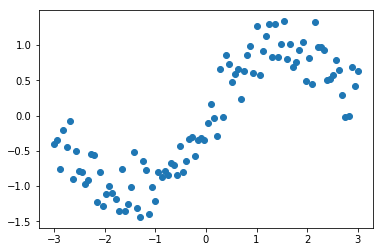

In [2]:
n_observations = 100
xs = np.linspace(-3, 3, n_observations)
ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_observations)
plt.scatter(xs, ys)
plt.show()

In [3]:
X=tf.placeholder(tf.float32,name='X')
Y=tf.placeholder(tf.float32,name='Y')

In [4]:
W=tf.Variable(tf.random_normal([1]),name='weight')
b=tf.Variable(tf.random_normal([1]),name='bias')

In [7]:
Y_pred=tf.add(tf.multiply(X,W),b)

W_2 = tf.Variable(tf.random_normal([1]), name='weight_2')
Y_pred = tf.add(tf.multiply(tf.pow(X, 2), W_2), Y_pred)
W_3 = tf.Variable(tf.random_normal([1]), name='weight_3')
Y_pred = tf.add(tf.multiply(tf.pow(X, 3), W_3), Y_pred)

In [8]:
sample_num = xs.shape[0]
loss = tf.reduce_sum(tf.pow(Y_pred - Y, 2)) / sample_num

In [9]:
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [10]:
n_samples = xs.shape[0]
with tf.Session() as sess:
	# 记得初始化所有变量
	sess.run(tf.global_variables_initializer()) 
	
	writer = tf.summary.FileWriter('./graphs/polynomial_reg', sess.graph)
	
	# 训练模型
	for i in range(1000):
		total_loss = 0
		for x, y in zip(xs, ys):
			# 通过feed_dic把数据灌进去
			_, l = sess.run([optimizer, loss], feed_dict={X: x, Y:y}) 
			total_loss += l
		if i%20 ==0:
			print('Epoch {0}: {1}'.format(i, total_loss/n_samples))

	# 关闭writer
	writer.close()
    # 取出w和b的值
	W, W_2, W_3, b = sess.run([W, W_2, W_3, b])

Epoch 0: 0.8825238407621054
Epoch 20: 0.01587539213017237
Epoch 40: 0.011353640465079744
Epoch 60: 0.008198344698755734
Epoch 80: 0.005980745117607853
Epoch 100: 0.004421856413569003
Epoch 120: 0.0033258895327037408
Epoch 140: 0.0025553759812567377
Epoch 160: 0.0020137292671032012
Epoch 180: 0.001633059459635433
Epoch 200: 0.001365637221345679
Epoch 220: 0.0011778856719771458
Epoch 240: 0.0010461796133238365
Epoch 260: 0.0009538927571411904
Epoch 280: 0.0008893214149421169
Epoch 300: 0.0008442254648396386
Epoch 320: 0.0008128065435059994
Epoch 340: 0.0007909821121187122
Epoch 360: 0.0007758800242534569
Epoch 380: 0.000765479804581986
Epoch 400: 0.0007583616802964599
Epoch 420: 0.0007535284977659096
Epoch 440: 0.0007502807109239939
Epoch 460: 0.000748128123233181
Epoch 480: 0.000746728334463067
Epoch 500: 0.0007458423081030752
Epoch 520: 0.0007453035224327565
Epoch 540: 0.0007449971291701019
Epoch 560: 0.0007448438635415755
Epoch 580: 0.0007447884875105615
Epoch 600: 0.00074479463946431

In [11]:
print("W:"+str(W[0]))
print("W_2:"+str(W_2[0]))
print("W_3:"+str(W_3[0]))
print("b:"+str(b[0]))

W:0.9126059
W_2:0.015339507
W_3:-0.09695014
b:-0.089366734


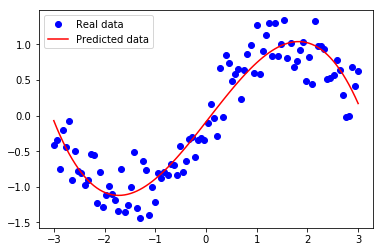

In [12]:
plt.plot(xs, ys, 'bo', label='Real data')
plt.plot(xs, xs*W + np.power(xs,2)*W_2 + np.power(xs,3)*W_3 + b, 'r', label='Predicted data')
plt.legend()
plt.show()